<a href="https://colab.research.google.com/github/ylmgrbzz/Estimating-DOGE-Last-30-Days-Value-With-RandomForest-Matplotlib/blob/main/Estimating_DOGE_Last_30_Days_Value_With_RandomForest_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import pandas_datareader.data as pdr
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('DOGE-USD.csv')


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-16,0.003310,0.003521,0.003114,0.003168,0.003168,68128483
1,2019-05-17,0.003169,0.003186,0.002831,0.002962,0.002962,66495399
2,2019-05-18,0.002966,0.003054,0.002897,0.003005,0.003005,54849676
3,2019-05-19,0.003011,0.003195,0.003000,0.003178,0.003178,63883932
4,2019-05-20,0.003179,0.003186,0.002933,0.003041,0.003041,56440462


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1064 non-null   object 
 1   Open       1064 non-null   float64
 2   High       1064 non-null   float64
 3   Low        1064 non-null   float64
 4   Close      1064 non-null   float64
 5   Adj Close  1064 non-null   float64
 6   Volume     1064 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 58.3+ KB


In [7]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1.064000e+03
mean,0.085322,0.090673,0.080134,0.085468,0.085468,1.573406e+09
std,0.120541,0.130218,0.111096,0.120610,0.120610,4.486224e+09
min,0.001540,0.001612,0.001247,0.001537,0.001537,1.581394e+07
25%,0.002596,0.002639,0.002557,0.002596,0.002596,7.277687e+07
50%,0.003390,0.003497,0.003267,0.003393,0.003393,1.841482e+08
75%,0.168852,0.173441,0.160273,0.168855,0.168855,1.301885e+09
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [8]:
df.shape



(1064, 7)

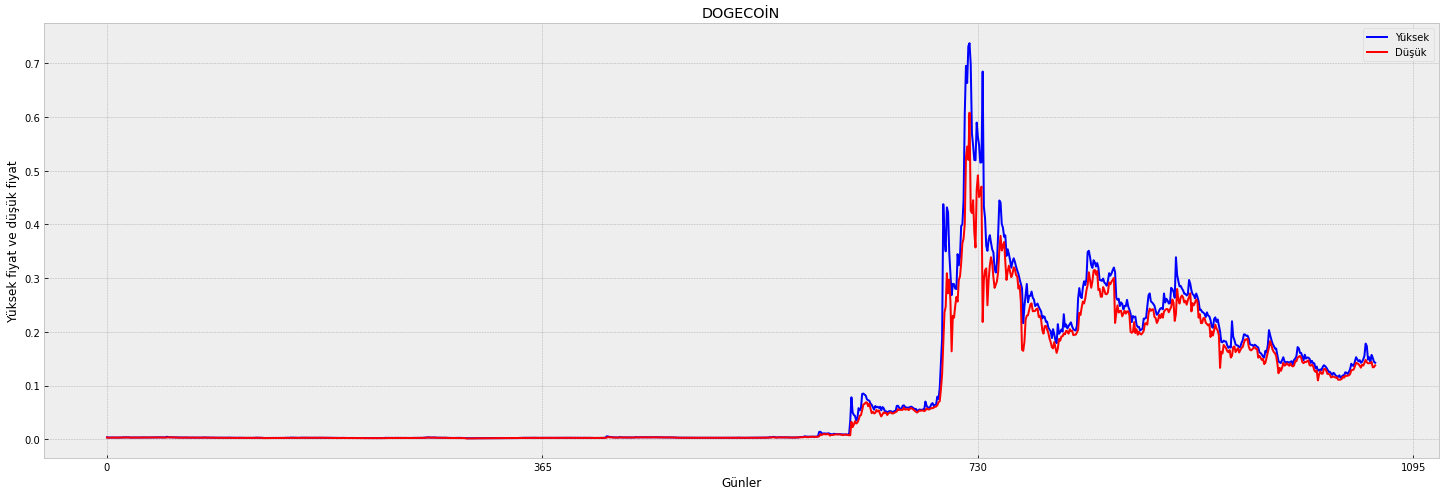

In [9]:
plt.figure(figsize = (25,8))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Yüksek fiyat ve düşük fiyat")
plt.xticks([365*x for x in range(0,20)])
plt.plot(df["High"],color="blue")
plt.plot(df["Low"],color="red")
plt.legend(["Yüksek", "Düşük"])
plt.show()

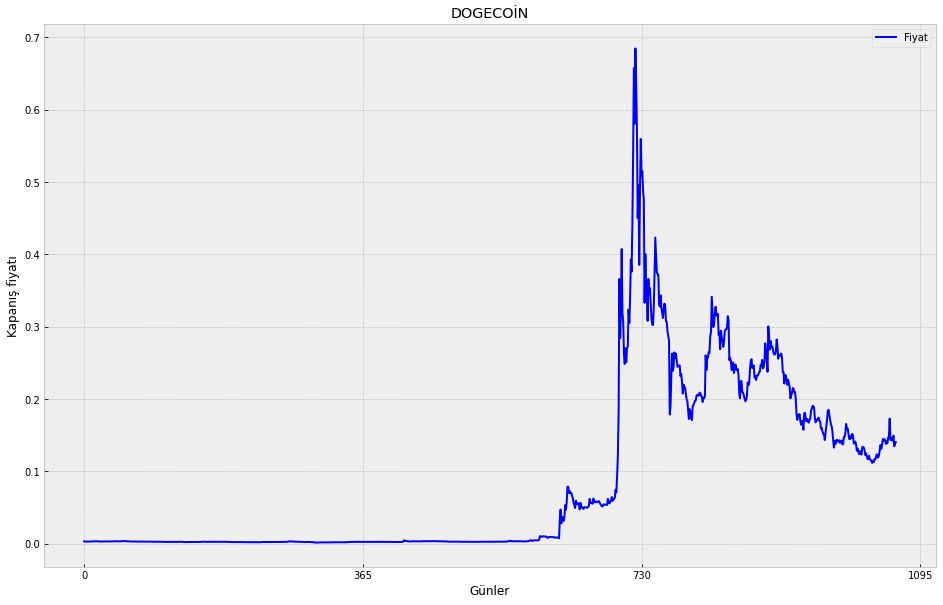

In [10]:
plt.figure(figsize = (16,10))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Kapanış fiyatı")
plt.xticks([365*x for x in range(0,20)])
plt.plot(df["Close"],color='blue')
plt.legend(["Fiyat"])
plt.show()

In [11]:
df = df[["Close"]]
df.head(10)

,Close
0,0.003168
1,0.002962
2,0.003005
3,0.003178
4,0.003041
5,0.003086
6,0.002939
7,0.002961
8,0.002995
9,0.002991


In [12]:
future_days = 30


In [13]:
df["Tahmin"] = df["Close"].shift(-future_days)
df.head(35)

,Close,Tahmin
0,0.003168,0.003157
1,0.002962,0.003186
2,0.003005,0.003190
3,0.003178,0.003125
4,0.003041,0.003130
5,0.003086,0.003161
6,0.002939,0.003223
7,0.002961,0.003279
8,0.002995,0.003304
9,0.002991,0.003368


In [14]:
df.tail(35)


,Close,Tahmin
1029,0.116885,0.144303
1030,0.115602,0.149535
1031,0.115136,0.134654
1032,0.111608,0.138076
1033,0.114048,0.140426
1034,0.112784,NaN
1035,0.116908,NaN
1036,0.116502,NaN
1037,0.119306,NaN
1038,0.123569,NaN


In [15]:
X = np.array(df.drop(["Tahmin"],1))[:-future_days]
print(X)

[[0.003168]
 [0.002962]
 [0.003005]
 ...
 [0.115136]
 [0.111608]
 [0.114048]]


In [16]:
y = np.array(df["Tahmin"])[:-future_days]
print(y)

[0.003157 0.003186 0.00319  ... 0.134654 0.138076 0.140426]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape --> {X_train.shape}')
print(f'X_test shape --> {X_test.shape}')
print(f'y_train shape --> {y_train.shape}')
print(f'y_test shape --> {y_test.shape}')

X_train shape --> (827, 1)
X_test shape --> (207, 1)
y_train shape --> (827,)
y_test shape --> (207,)


In [18]:
x_future = df.drop(["Tahmin"],1)[-future_days:]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[0.112784],
       [0.116908],
       [0.116502],
       [0.119306],
       [0.123569],
       [0.119154],
       [0.119339],
       [0.122481],
       [0.129727],
       [0.13655 ],
       [0.131013],
       [0.135868],
       [0.144732],
       [0.142657],
       [0.14447 ],
       [0.14321 ],
       [0.137826],
       [0.141315],
       [0.138913],
       [0.146453],
       [0.148591],
       [0.172907],
       [0.143417],
       [0.146102],
       [0.142549],
       [0.144303],
       [0.149535],
       [0.134654],
       [0.138076],
       [0.140426]])

In [19]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=200)
randomForest.fit(X_train,y_train)
accuracy = randomForest.score(X_test,y_test)
print("Accuracy : ", accuracy)

Accuracy :  0.8221833835368089


In [20]:
randomForest_prediction = randomForest.predict(x_future)
print(randomForest_prediction)

[0.13866741 0.14537565 0.14537565 0.20261972 0.13926921 0.17574209
 0.26497671 0.16630224 0.13653135 0.12268217 0.13676752 0.12449575
 0.11471103 0.13481461 0.11645813 0.14894965 0.12265604 0.12941321
 0.12135754 0.11755031 0.11588746 0.14958684 0.14839791 0.11642148
 0.1310116  0.11925253 0.1202532  0.13885251 0.12240951 0.12970167]


In [21]:
predictions = randomForest_prediction

valid = df[X.shape[0]:]
valid

,Close,Tahmin
1034,0.112784,NaN
1035,0.116908,NaN
1036,0.116502,NaN
1037,0.119306,NaN
1038,0.123569,NaN
1039,0.119154,NaN
1040,0.119339,NaN
1041,0.122481,NaN
1042,0.129727,NaN
1043,0.136550,NaN


In [22]:
valid["Tahmin"] = predictions
valid

,Close,Tahmin
1034,0.112784,0.138667
1035,0.116908,0.145376
1036,0.116502,0.145376
1037,0.119306,0.202620
1038,0.123569,0.139269
1039,0.119154,0.175742
1040,0.119339,0.264977
1041,0.122481,0.166302
1042,0.129727,0.136531
1043,0.136550,0.122682


In [23]:
valuesOfClose = np.array(df["Close"])
valuesOfPrediction = np.array(valid["Tahmin"])
combinated_array = np.append(valuesOfClose,valuesOfPrediction)
combinated_array

array([0.003168  , 0.002962  , 0.003005  , ..., 0.13885251, 0.12240951,
       0.12970167])

In [24]:
extended = pd.DataFrame(columns=["30ekle"])
extended["30ekle"] = combinated_array
extended

,30ekle
0,0.003168
1,0.002962
2,0.003005
3,0.003178
4,0.003041
...,...
1089,0.119253
1090,0.120253
1091,0.138853
1092,0.122410


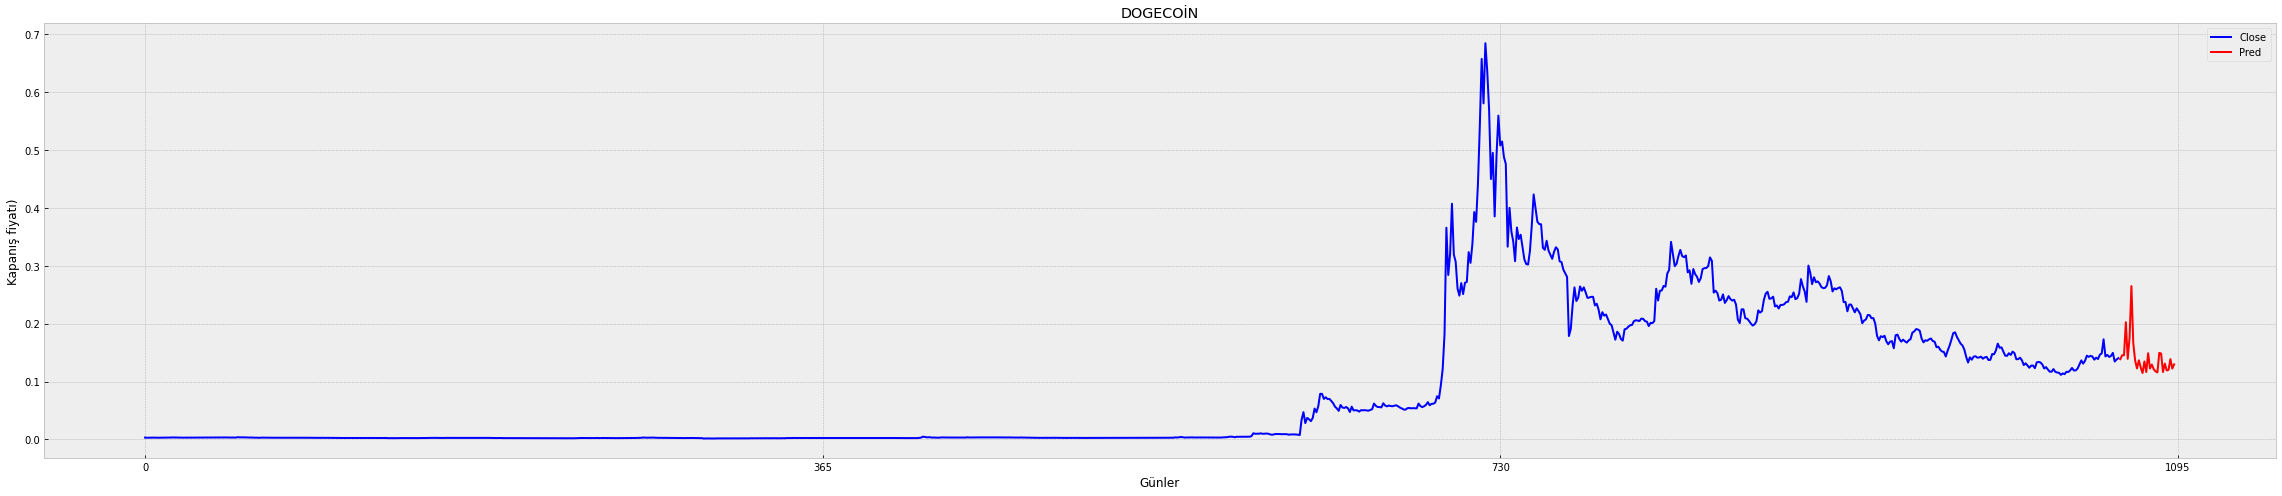

In [25]:
plt.figure(figsize = (40,8))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Kapanış fiyatı)")
plt.xticks([365*x for x in range(0,1827)])
plt.plot(df["Close"],color="blue")
plt.plot(extended["30ekle"].tail(30),color="red")
plt.legend(["Close","Pred"])
plt.show()

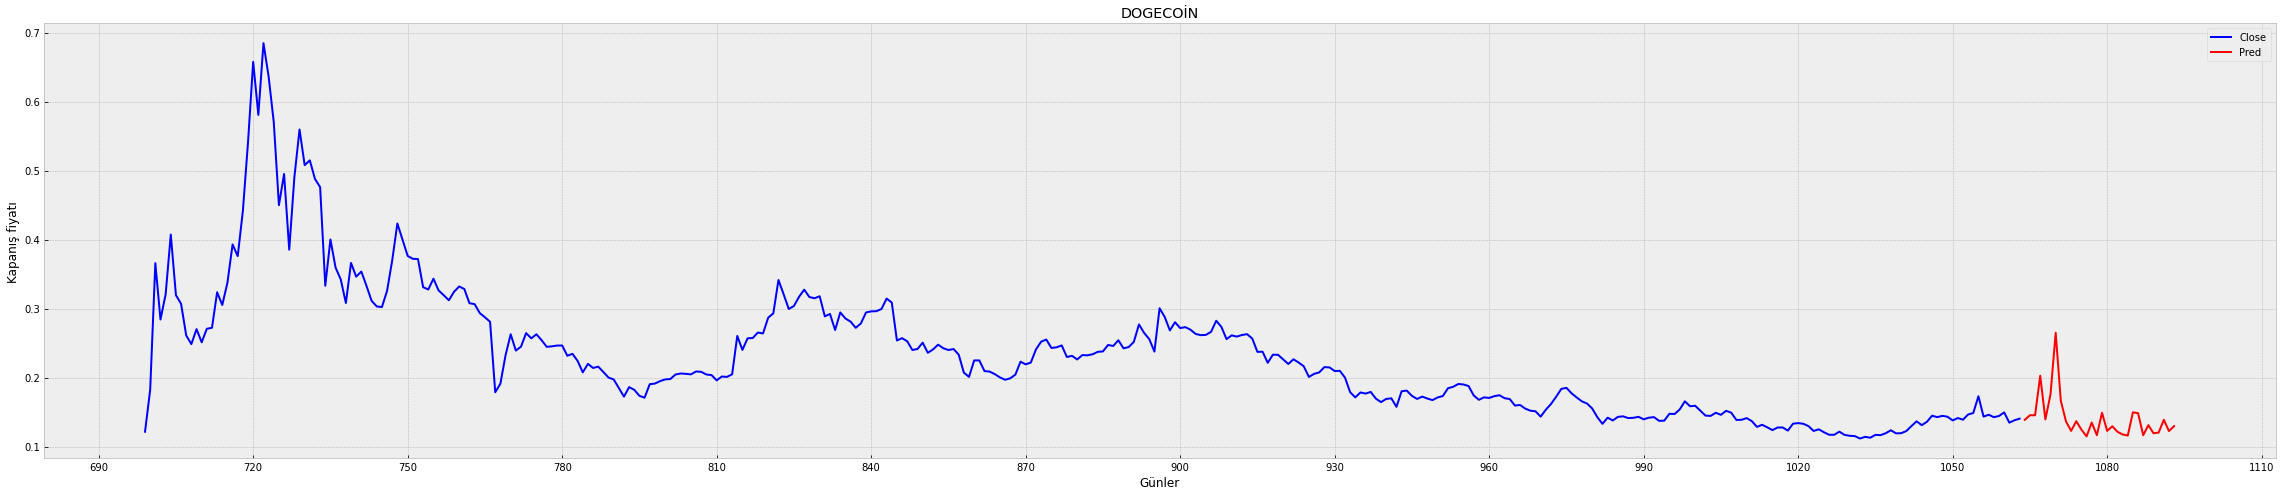

In [26]:
plt.figure(figsize = (40,8))
plt.title("DOGECOİN")
plt.xlabel("Günler")
plt.ylabel("Kapanış fiyatı")
plt.xticks([30*x for x in range(0,1860)])
plt.plot(df["Close"].tail(365),color="blue")
plt.plot(extended["30ekle"].tail(30),color="red")
plt.legend(["Close","Pred"])
plt.show()